# Disciple - 取引シミュレーション（Jupyter用）

In [1]:
import datetime
import os
import re

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from funcs.conv import conv_transaction_df2html
from funcs.setting import get_trend_footer, load_setting
from funcs.tide import get_date_dir_from_file, get_date_str_from_file_2
from funcs.tse import get_ticker_name_list
from modules.disciple import Disciple
from structs.res import AppRes

In [2]:
debug = False

res = AppRes()
excel = "ticks_20260209.xlsx"
# code = "285A"
code = "4689"
# code = "7011"
# code = "7203"
# code = "8306"
# code = "8410"
# code = "9984"

dict_ts = dict()
dict_ts["datetime_str_2"] = get_date_str_from_file_2(excel)
dict_setting = load_setting(res, code)
title_str = get_trend_footer(dict_ts, dict_setting)

date_str = get_date_dir_from_file(excel)
print(date_str)

if debug:
    output_dir = os.path.join("tmp", date_str)
else:
    output_dir = os.path.join(res.dir_output, date_str)
print(output_dir)
os.makedirs(output_dir, exist_ok=True)

app = Disciple(excel, code, dict_setting)
app.run()

2026/02/09
output/2026/02/09
パラメータ
PERIOD_WARMUP : 30
PERIOD_MA_1 : 30
LOSSCUT_1 : -3.0
N_MINUS_MAX : 150
DD_PROFIT : 2.0
DD_RATIO : 0.9


In [3]:
# Matplotlib の共通設定
FONT_PATH = "fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

In [4]:
# テクニカル指標
print("テクニカル指標")
df_tech = app.getTechnicals()
print(df_tech)

テクニカル指標
                               ts  price    volume        vwap         ma1  \
2026-02-09 09:00:06  1.770595e+09  422.4   2223100  422.400000  422.400000   
2026-02-09 09:00:08  1.770595e+09  420.6   2305200  420.600000  421.500000   
2026-02-09 09:00:10  1.770595e+09  419.2   2527300  419.577844  420.733333   
2026-02-09 09:00:12  1.770595e+09  421.0   2592000  419.827270  420.800000   
2026-02-09 09:00:14  1.770595e+09  420.4   2893300  420.084751  420.720000   
...                           ...    ...       ...         ...         ...   
2026-02-09 15:24:41  1.770618e+09  423.3  23490700  425.103494  423.150000   
2026-02-09 15:24:43  1.770618e+09  423.3  23490700  425.103494  423.156667   
2026-02-09 15:24:45  1.770618e+09  423.2  23493100  425.103279  423.160000   
2026-02-09 15:24:47  1.770618e+09  423.2  23493100  425.103279  423.160000   
2026-02-09 15:24:49  1.770618e+09  423.3  23494000  425.103202  423.163333   

                     cross1  profit  profit_max  drawdo

# of cross: 12
output/2026/02/04/4689_trend_technical.png


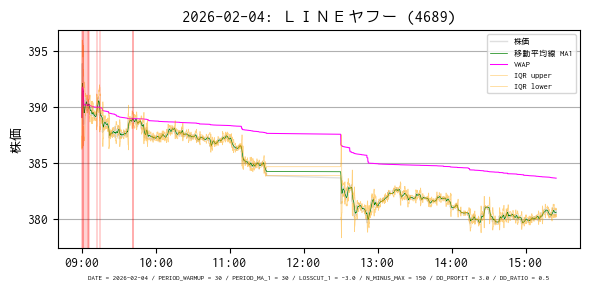

In [14]:
n = 1

if n == 1:
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.grid(axis="y")
else:
    fig = plt.figure(figsize=(6, 8))
    ax = dict()
    gs = fig.add_gridspec(
        n,
        1,
        wspace=0.0,
        hspace=0.0,
        height_ratios=[2 if i == 0 else 1 for i in range(n)],
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
        ax[i].grid(axis="y")

name = get_ticker_name_list([code])[code]
ax.set_title(f"{dict_ts['datetime_str_2']}: {name} ({code})")
ax.plot(df_tech["price"], linewidth=1, color="gray", alpha=0.25, label="株価")
ax.plot(df_tech["ma1"], linewidth=0.5, color="green", label="移動平均線 MA1")
ax.plot(df_tech["vwap"], linewidth=0.75, color="magenta", label="VWAP")
ax.plot(df_tech["upper"], linewidth=0.5, color="orange", alpha=0.5, label="IQR upper")
ax.plot(df_tech["lower"], linewidth=0.5, color="orange", alpha=0.5, label="IQR lower")

ax.set_xlabel(title_str, fontsize=5)
ax.set_ylabel("株価")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend(fontsize=6)

y_open = df_tech.iloc[0]["price"]
rng = y_open * 0.01
y_min, y_max = ax.get_ylim()
if y_open - rng < y_min:
    y_min = y_open - rng
if y_max < y_open + rng:
    y_max = y_open + rng
ax.set_ylim(y_min, y_max)

list_cross = df_tech[df_tech["cross1"] != 0].index
print(f"# of cross: {len(list_cross)}")
for t in list_cross:
    ax.axvline(x=t, color="red", linestyle="solid", linewidth=0.25)

# plt.suptitle(title_str, fontsize=5)
plt.tight_layout()
# plt.subplots_adjust(top=0.89)
output = os.path.join(output_dir, f"{code}_trend_technical.png")
print(output)
plt.savefig(output)
plt.show()